In [1]:
# %matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
from matplotlib import cm
import os

In [2]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

In [3]:
n_qubits = 2
D = 101
betas_res = 100
gammas_res = 100
path = "concurrences/batch_coins/"
suffix = "_r"
betas = np.linspace(0,np.pi/2,betas_res)
gammas = np.linspace(0,2*np.pi,gammas_res)
cwd = os.getcwd()
filename = "concurrences" + suffix + ".txt"
concurrences = np.reshape(np.genfromtxt(cwd+"/data/"+path+filename,usecols=0,delimiter=",",dtype=np.longdouble),(betas_res,gammas_res),order='C')

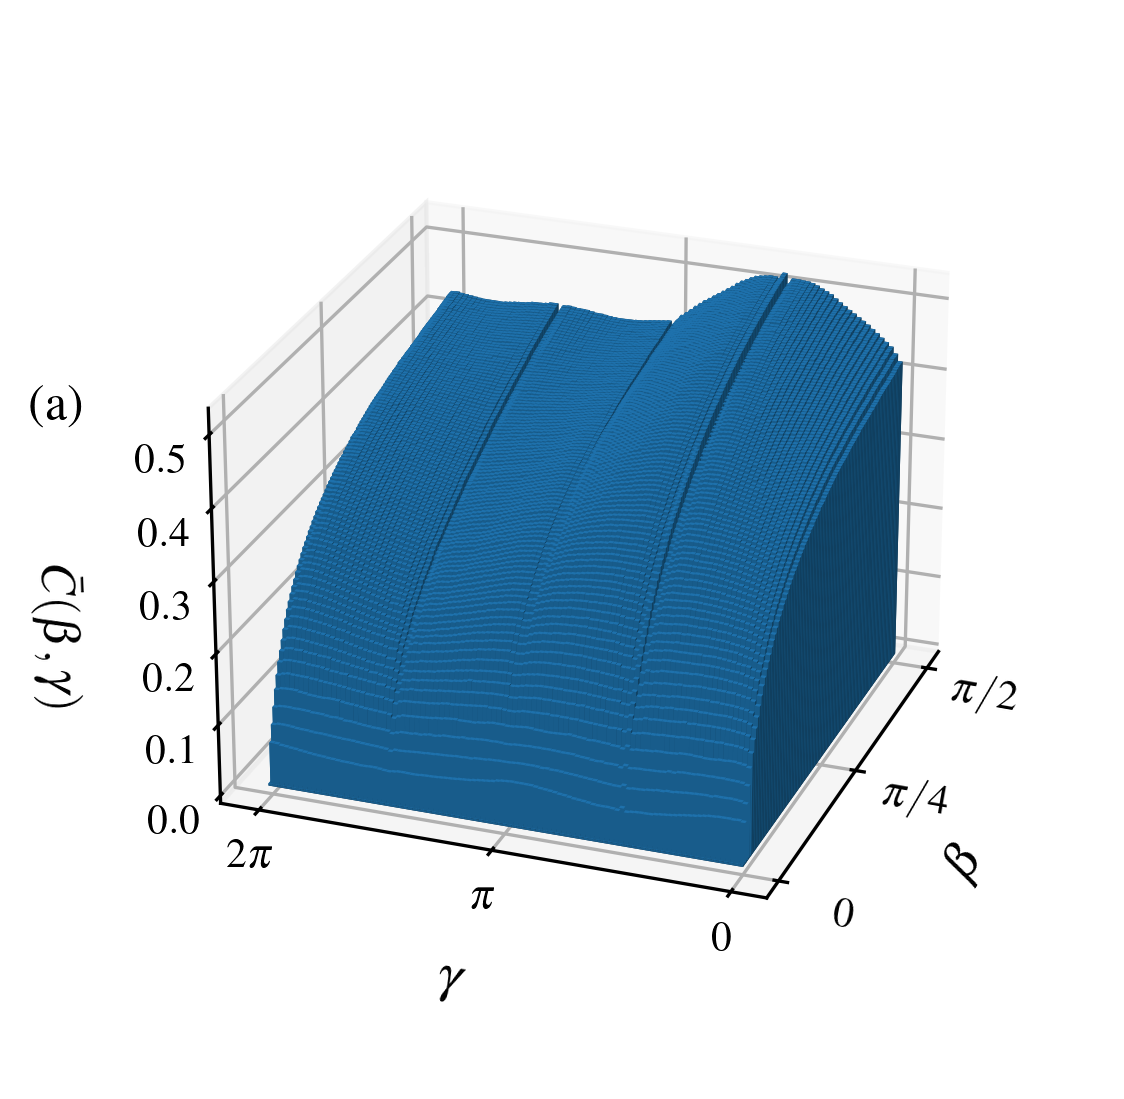

In [4]:
_xx, _yy = np.meshgrid(betas, gammas)
x, y = _xx.ravel(), _yy.ravel()
width = np.max(betas)/betas_res
depth = np.max(gammas)/gammas_res
light = LightSource(azdeg=315,altdeg=60)
fig = plt.figure(figsize=(6,4.5),dpi=300)
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=25,azim=-160,roll=0)
ax.set_xlabel(r'$\beta$',fontsize=12)
ax.set_xticks([0,np.pi/4,np.pi/2],[r'$0$',r'$\pi/4$',r'$\pi/2$'],rotation=-10,verticalalignment='bottom',horizontalalignment='center')
ax.tick_params('x',pad=7)
ax.set_ylabel(r'$\gamma$',fontsize=12)
ax.set_yticks([0,np.pi,2*np.pi],[r'$0$',r'$\pi$',r'$2\pi$'])
ax.tick_params('y',pad=-2)
ax.set_zlabel(r'$\bar{C}(\beta,\gamma)$',fontsize=12)
ax.tick_params('z',pad=0)
ax.set_box_aspect(None, zoom=0.85)
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5
ax.zaxis.labelpad = 5
fig.text(0.225,0.6,'(a)', horizontalalignment='center', verticalalignment='center', fontsize=12)
ax.bar3d(x,y,0,width,depth,concurrences.flatten('F'),lightsource=light)

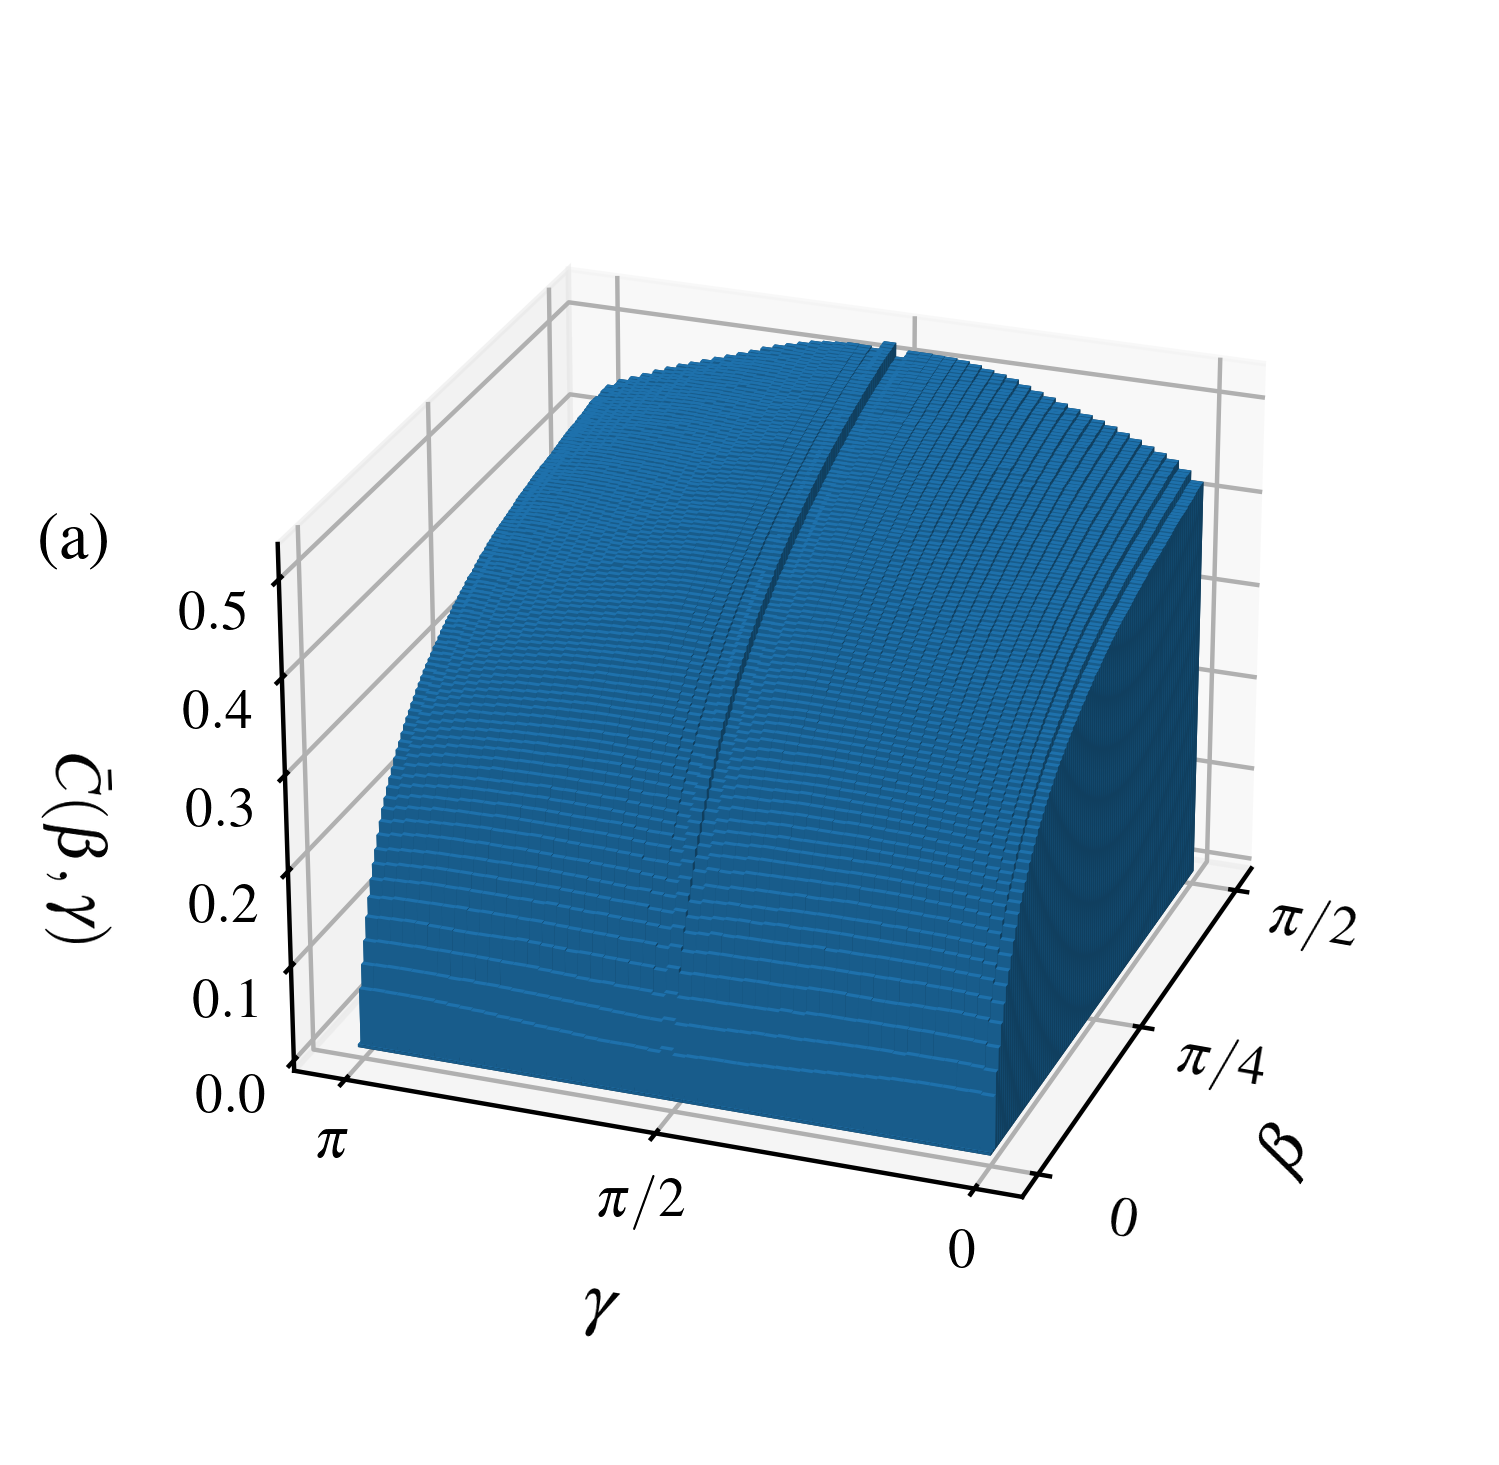

In [5]:
half_betas_res = round(betas_res/2)
half_gammas_res = round(gammas_res/2)
_xx, _yy = np.meshgrid(betas, gammas[:half_gammas_res])
x, y = _xx.ravel(), _yy.ravel()
width = np.max(betas)/betas_res
depth = np.max(gammas)/gammas_res
light = LightSource(azdeg=315,altdeg=60)
fig = plt.figure(figsize=(6,4.5),dpi=400)
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=25,azim=-160,roll=0)
ax.set_xlabel(r'$\beta$',fontsize=12)
ax.set_xticks([0,np.pi/4,np.pi/2],[r'$0$',r'$\pi/4$',r'$\pi/2$'],rotation=-10,verticalalignment='bottom',horizontalalignment='center')
ax.tick_params('x',pad=7)
ax.set_ylabel(r'$\gamma$',fontsize=12)
ax.set_yticks([0,np.pi/2,np.pi],[r'$0$',r'$\pi/2$',r'$\pi$'])
ax.tick_params('y',pad=-2)
ax.set_zlabel(r'$\bar{C}(\beta,\gamma)$',fontsize=12)
ax.tick_params('z',pad=0)
ax.set_box_aspect(None, zoom=0.85)
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5
ax.zaxis.labelpad = 5
fig.text(0.225,0.6,'(a)', horizontalalignment='center', verticalalignment='center', fontsize=12)
ax.bar3d(x,y,0,width,depth,concurrences[:,:half_gammas_res].flatten('F'),lightsource=light)

In [6]:
# n_qubits = 2
# D = 101
# betas_res = 100
# gammas_res = 100
# path = "concurrences/batch_coins/"
# suffix = "_r"
# betas = np.linspace(0,np.pi/2,betas_res)
# gammas = np.linspace(0,2*np.pi,gammas_res)
# averages = np.zeros((betas_res,gammas_res),np.longdouble)
# cwd = os.getcwd()
# for b in range(betas_res):
#     for g in range(gammas_res):
#         n = b * gammas_res + g
#         filename = str(n) + suffix + ".txt"
#         concurrences = np.genfromtxt(cwd+"/data/"+path+filename, usecols = 0, delimiter=",", dtype = np.longdouble)
#         averages[b,g] = np.average(concurrences)

In [7]:
# _xx, _yy = np.meshgrid(betas, gammas)
# x, y = _xx.ravel(), _yy.ravel()
# width = np.max(betas)/betas_res
# depth = np.max(gammas)/gammas_res
# light = LightSource(azdeg=315,altdeg=60)
# fig = plt.figure(figsize=(6,4.5),dpi=300)
# ax = fig.add_subplot(projection='3d')
# ax.view_init(elev=25,azim=-160,roll=0)
# ax.set_xlabel(r'$\beta$',fontsize=12)
# ax.set_xticks([0,np.pi/4,np.pi/2],[r'$0$',r'$\pi/4$',r'$\pi/2$'],rotation=-10,verticalalignment='bottom',horizontalalignment='center')
# ax.tick_params('x',pad=7)
# ax.set_ylabel(r'$\gamma$',fontsize=12)
# ax.set_yticks([0,np.pi,2*np.pi],[r'$0$',r'$\pi$',r'$2\pi$'])
# ax.tick_params('y',pad=-2)
# ax.set_zlabel(r'$\bar{C}(\beta,\gamma)$',fontsize=12)
# ax.tick_params('z',pad=0)
# ax.set_box_aspect(None, zoom=0.85)
# ax.xaxis.labelpad = 5
# ax.yaxis.labelpad = 5
# ax.zaxis.labelpad = 5
# fig.text(0.225,0.6,'(a)', horizontalalignment='center', verticalalignment='center', fontsize=12)
# ax.bar3d(x,y,0,width,depth,averages.flatten('F'),lightsource=light)

In [8]:
# _xx, _yy = np.meshgrid(betas, gammas)
# x, y = _xx.ravel(), _yy.ravel()
# width = np.max(betas)/betas_res
# depth = np.max(gammas)/gammas_res
# light = LightSource(azdeg=315,altdeg=60)
# fig = plt.figure(figsize=(6,4.5),dpi=300)
# ax = fig.add_subplot(projection='3d')
# ax.view_init(elev=25,azim=-160,roll=0)
# ax.set_xlabel(r'$\beta$',fontsize=12)
# ax.set_xticks([0,np.pi/4,np.pi/2],[r'$0$',r'$\pi/4$',r'$\pi/2$'],rotation=-10,verticalalignment='bottom',horizontalalignment='center')
# ax.tick_params('x',pad=7)
# ax.set_ylabel(r'$\gamma$',fontsize=12)
# ax.set_yticks([0,np.pi,2*np.pi],[r'$0$',r'$\pi$',r'$2\pi$'])
# ax.tick_params('y',pad=-2)
# ax.set_zlabel(r'$\bar{C}(\beta,\gamma)$',fontsize=12)
# ax.tick_params('z',pad=0)
# ax.set_box_aspect(None, zoom=0.85)
# ax.xaxis.labelpad = 5
# ax.yaxis.labelpad = 5
# ax.zaxis.labelpad = 5
# surf = ax.plot_surface(_xx, _yy, averages.transpose(), cmap=cm.Greys,linewidth=0, antialiased=False)

In [9]:
# opts = np.argmax(averages)

In [10]:
full_betas_res = 1000
full_betas = np.linspace(0,np.pi/2,full_betas_res)
cwd = os.getcwd()
filename = "concurrences_beta" + suffix + ".txt"
beta_concurrences = np.genfromtxt(cwd+"/data/"+path+filename, usecols = 0, delimiter=",", dtype = np.longdouble)

Text(0, 0.5, '$\\bar{C}(\\beta,\\pi/2)$')

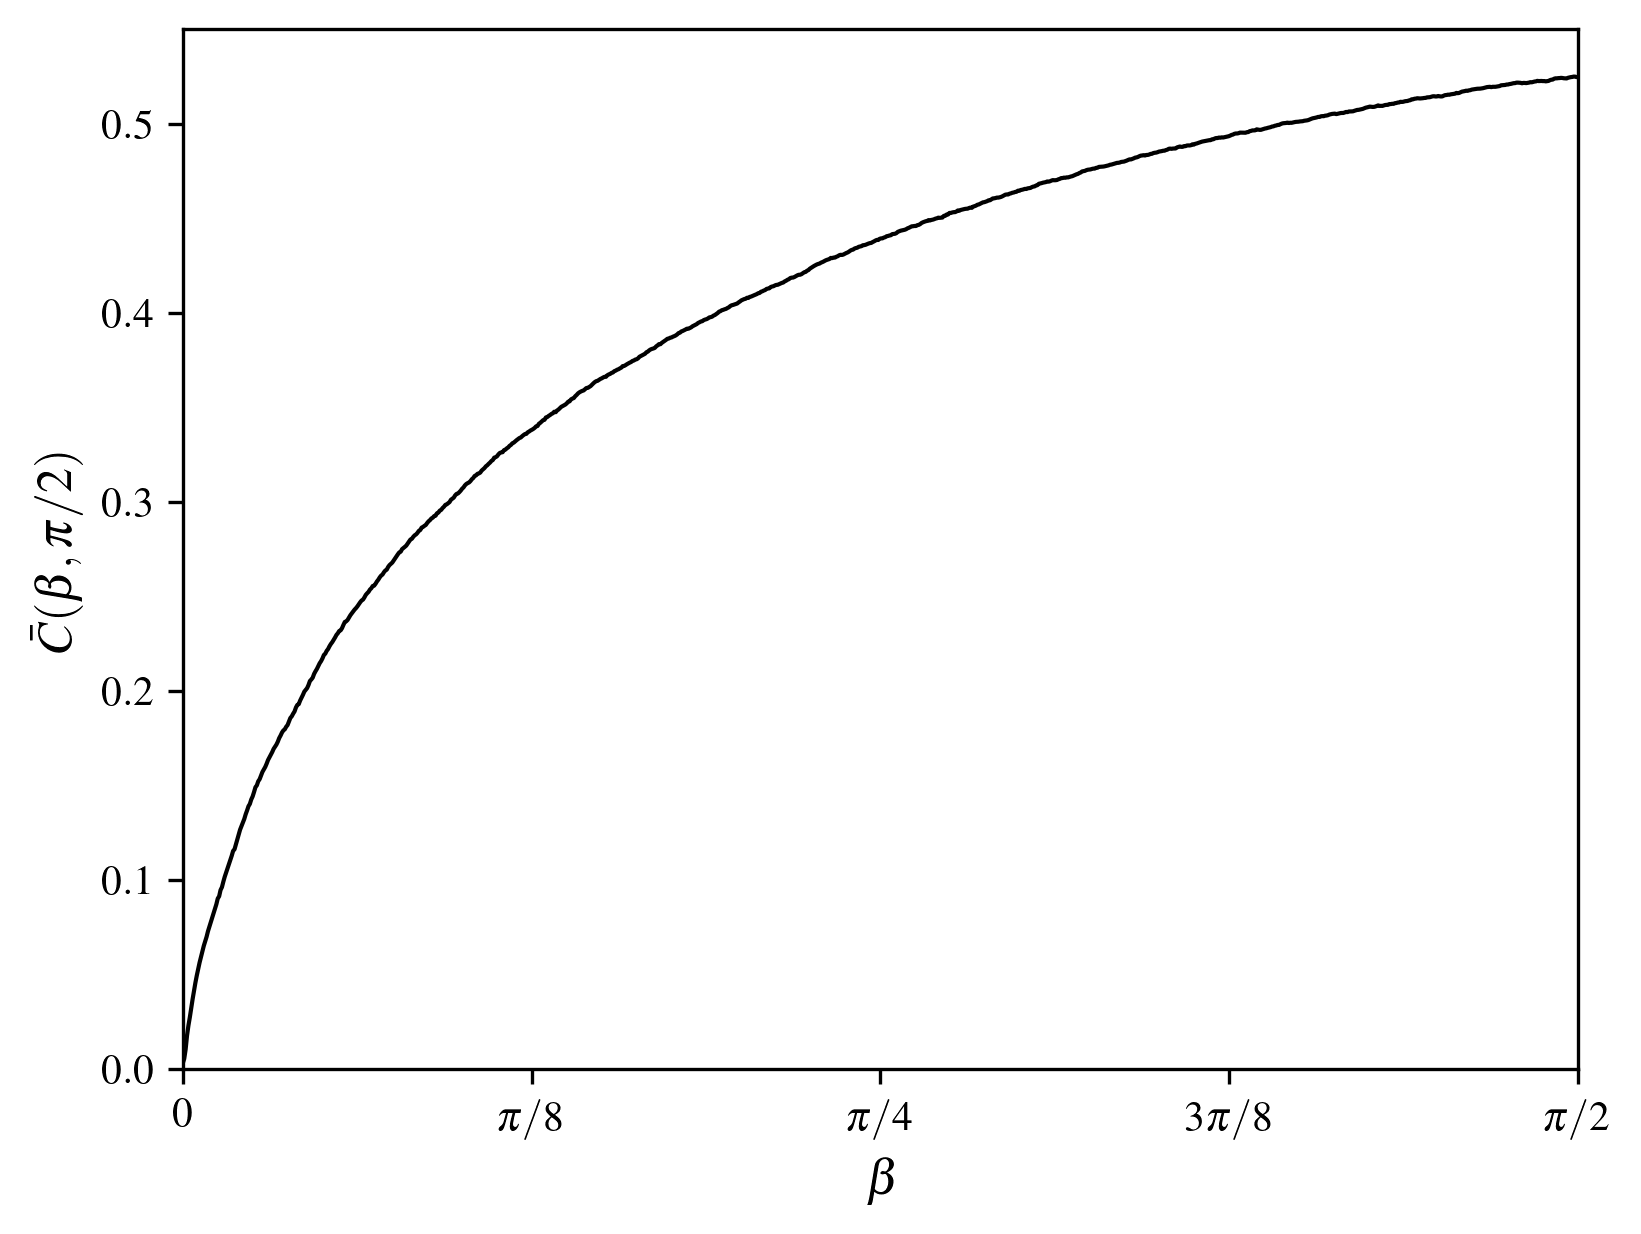

In [11]:
fig = plt.figure(figsize=(6,4.5),dpi=300)
ax = fig.subplots()
ticks = [0,np.pi/8,np.pi/4,3*np.pi/8,np.pi/2]
labels = ['0',r'$\pi/8$',r'$\pi/4$',r'$3\pi/8$',r'$\pi/2$']
ax.plot(full_betas,beta_concurrences,'k',lw=1)
ax.set_xticks(ticks,labels)
ax.set_xlim(0,np.pi/2)
ax.set_ylim(0,0.55)
ax.set_xlabel(r'$\beta$',fontsize=12)
ax.set_ylabel(r'$\bar{C}(\beta,\pi/2)$',fontsize=12)

In [12]:
full_gammas_res = 1000
full_gammas = np.linspace(0,2*np.pi,full_gammas_res)
cwd = os.getcwd()
filename = "concurrences_gamma" + suffix + ".txt"
gamma_concurrences = np.genfromtxt(cwd+"/data/"+path+filename, usecols = 0, delimiter=",", dtype = np.longdouble)

Text(0, 0.5, '$\\bar{C}(\\pi/2,\\gamma)$')

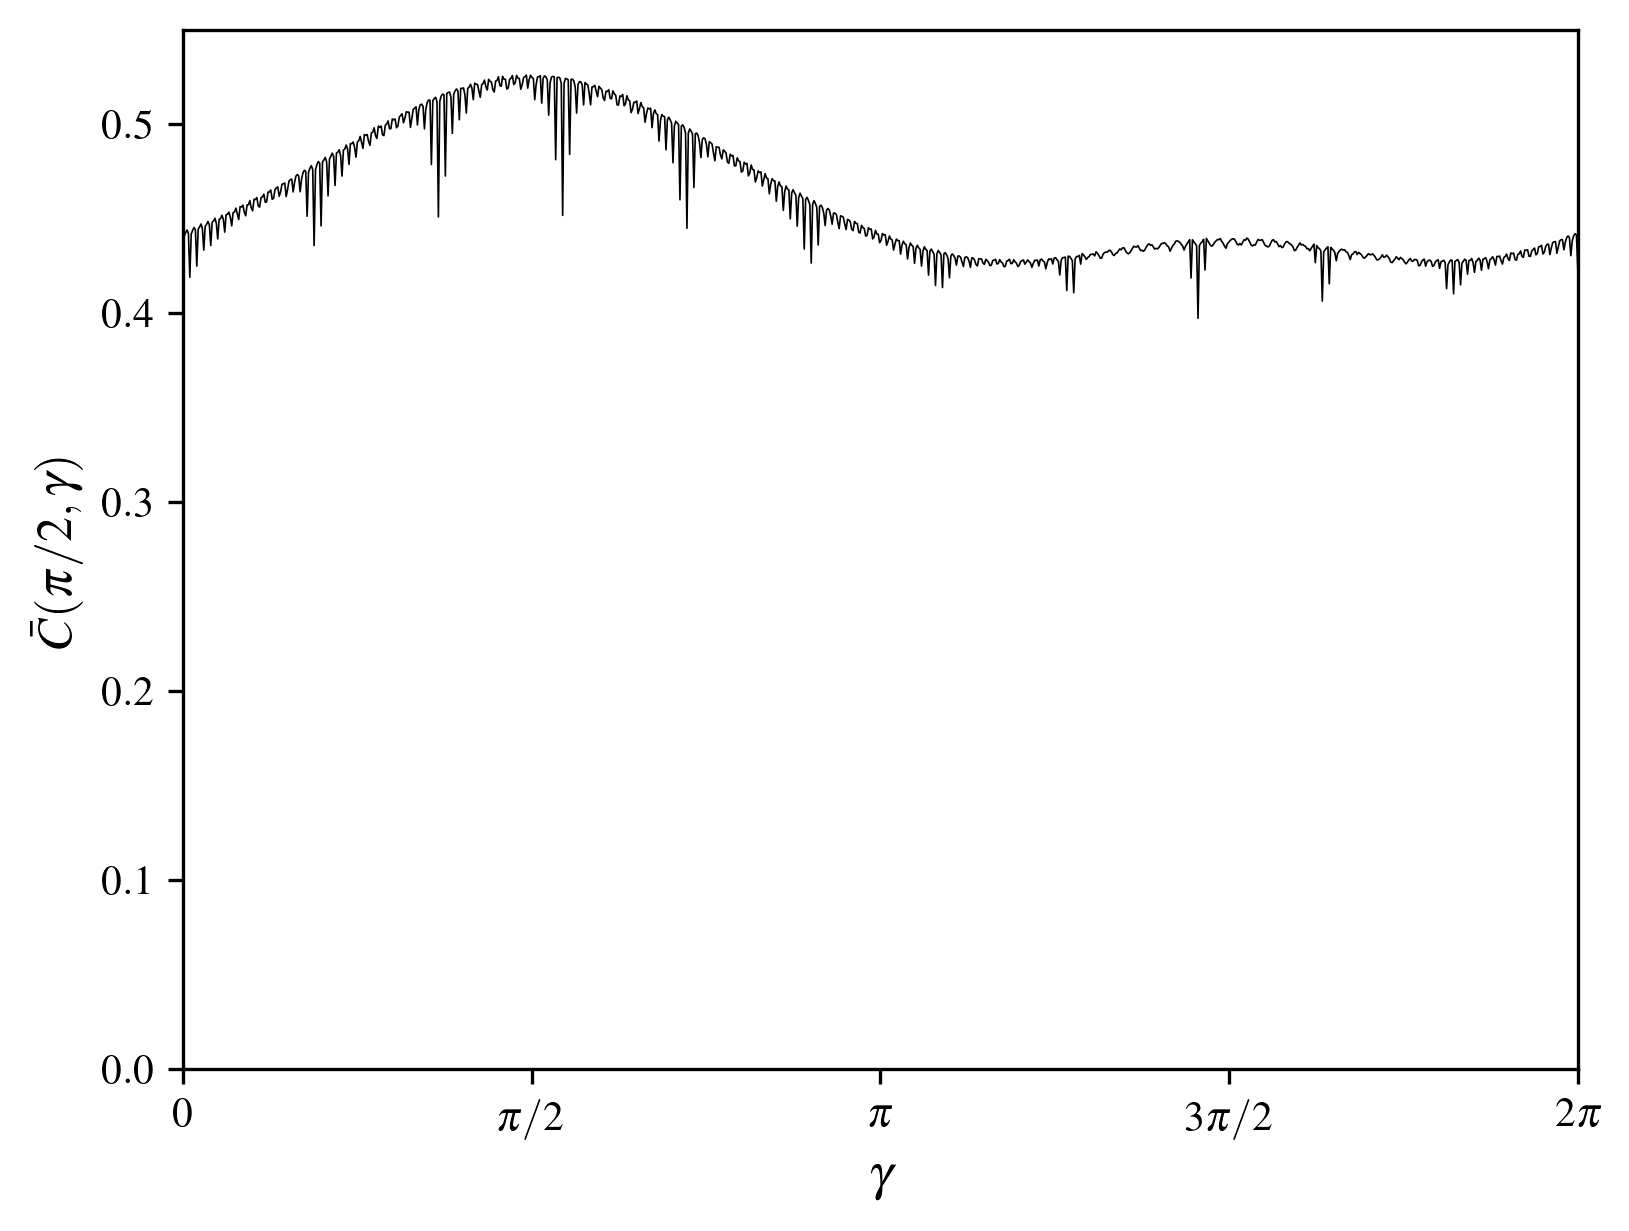

In [13]:
fig = plt.figure(figsize=(6,4.5),dpi=300)
ax = fig.subplots()
ticks = [0,np.pi/2,np.pi,3*np.pi/2,2*np.pi]
labels = ['0',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$']
ax.plot(full_gammas,gamma_concurrences,'k',lw=0.4)
ax.set_xticks(ticks,labels)
ax.set_xlim(0,2*np.pi)
ax.set_ylim(0,0.55)
ax.set_xlabel(r'$\gamma$',fontsize=12)
ax.set_ylabel(r'$\bar{C}(\pi/2,\gamma)$',fontsize=12)

In [14]:
# full_gammas_res = 1000
# full_gammas = np.linspace(0,2*np.pi,full_gammas_res)
# beta = np.pi/2
# gamma_averages = np.zeros((full_gammas_res),np.longdouble)
# cwd = os.getcwd()
# for b in range(full_gammas_res):
#     filename = str(b) + "_gamma" + suffix + ".txt"
#     concurrences = np.genfromtxt(cwd+"/data/"+path+filename, usecols = 0, delimiter=",", dtype = np.longdouble)
#     gamma_averages[b] = np.average(concurrences)

In [15]:
# fig = plt.figure(figsize=(6,4.5),dpi=300)
# ax = fig.subplots()
# ticks = [0,np.pi/2,np.pi,3*np.pi/2,2*np.pi]
# labels = ['0',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$']
# ax.plot(full_gammas,gamma_averages,'k',lw=0.4)
# ax.set_xticks(ticks,labels)
# ax.set_xlim(0,2*np.pi)
# ax.set_ylim(0,0.55)
# ax.set_xlabel(r'$\gamma$',fontsize=12)
# ax.set_ylabel(r'$\bar{C}(\pi/2,\gamma)$',fontsize=12)

Text(0, 0.5, '$\\bar{C}(\\pi/2,\\gamma)$')

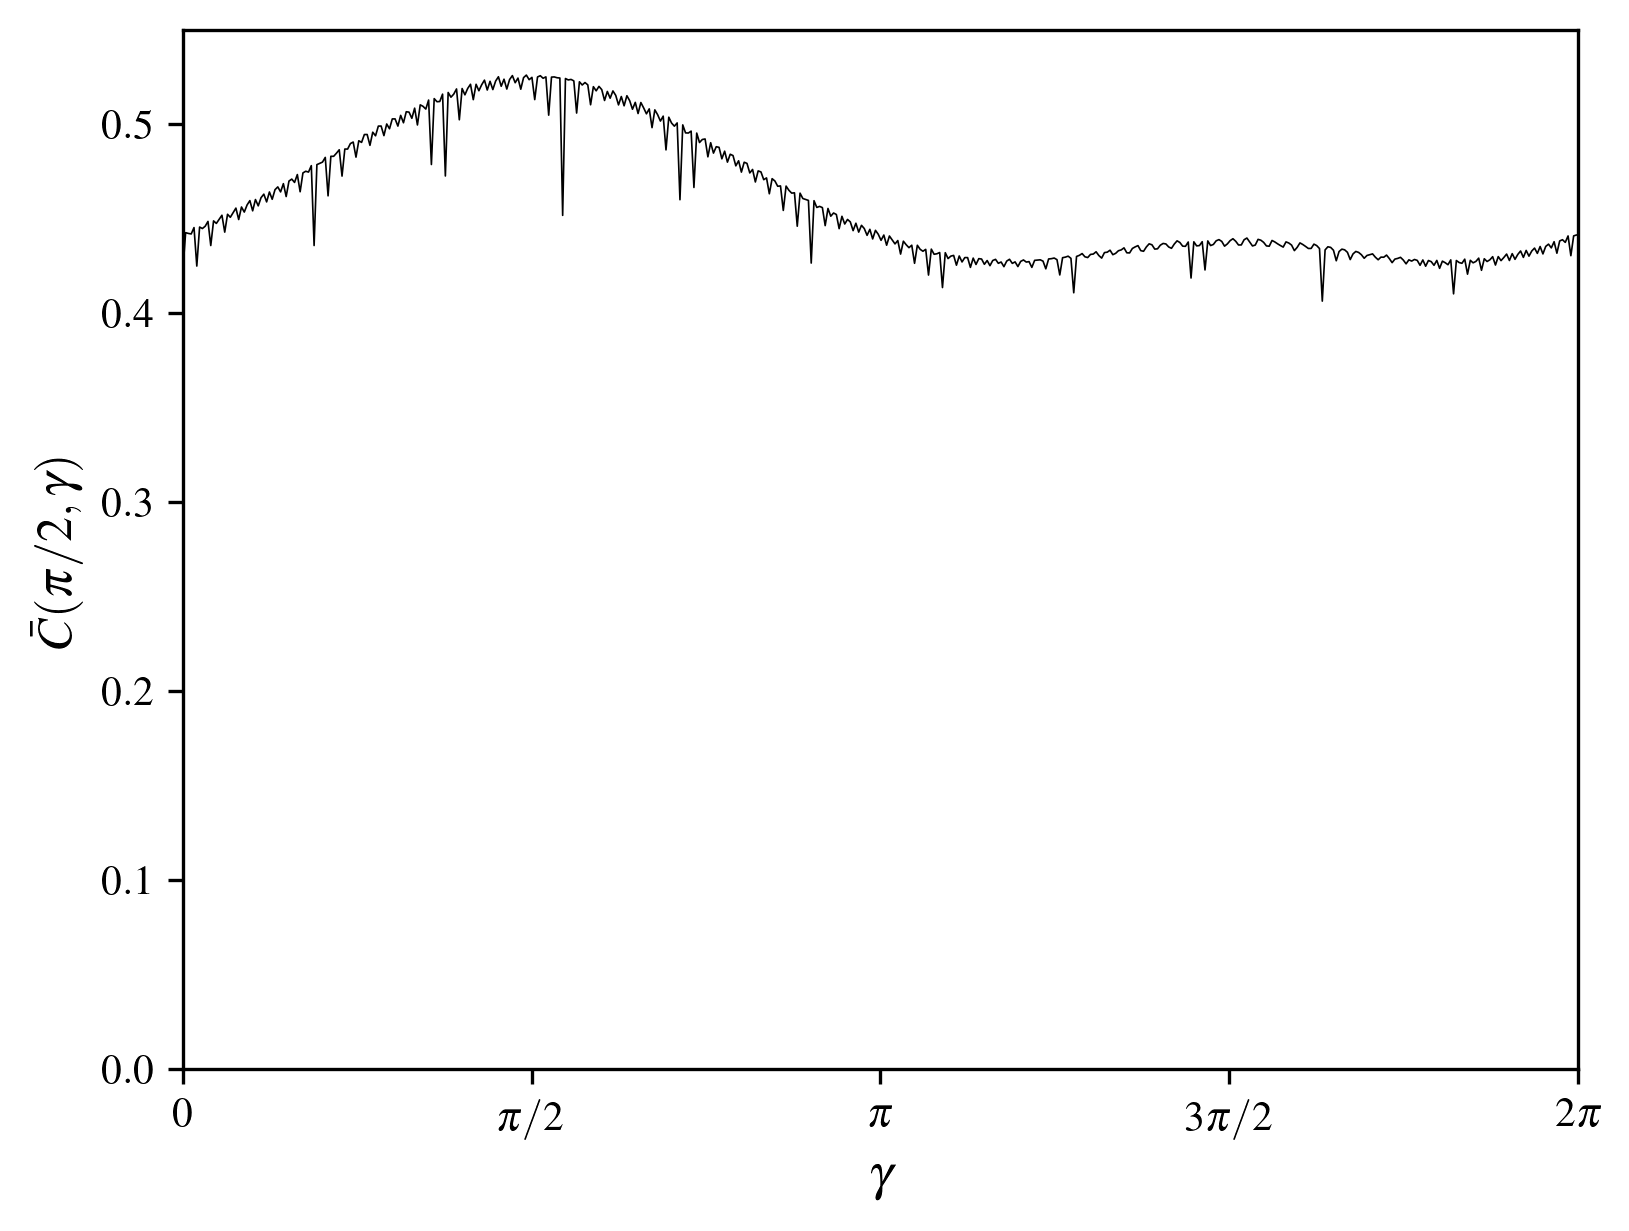

In [33]:
res = np.arange(0,1000,1)
selects = (res%2 == 0)
gamma_selects = np.append(full_gammas[selects],[2*np.pi])
gamma_averages_selects = np.append(gamma_concurrences[selects],[gamma_concurrences[-2]])
fig = plt.figure(figsize=(6,4.5),dpi=300)
ax = fig.subplots()
ticks = [0,np.pi/2,np.pi,3*np.pi/2,2*np.pi]
labels = ['0',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$']
ax.plot(gamma_selects,gamma_averages_selects,'k',lw=0.4)
ax.set_xticks(ticks,labels)
ax.set_xlim(0,2*np.pi)
ax.set_ylim(0,0.55)
ax.set_xlabel(r'$\gamma$',fontsize=12)
ax.set_ylabel(r'$\bar{C}(\pi/2,\gamma)$',fontsize=12)

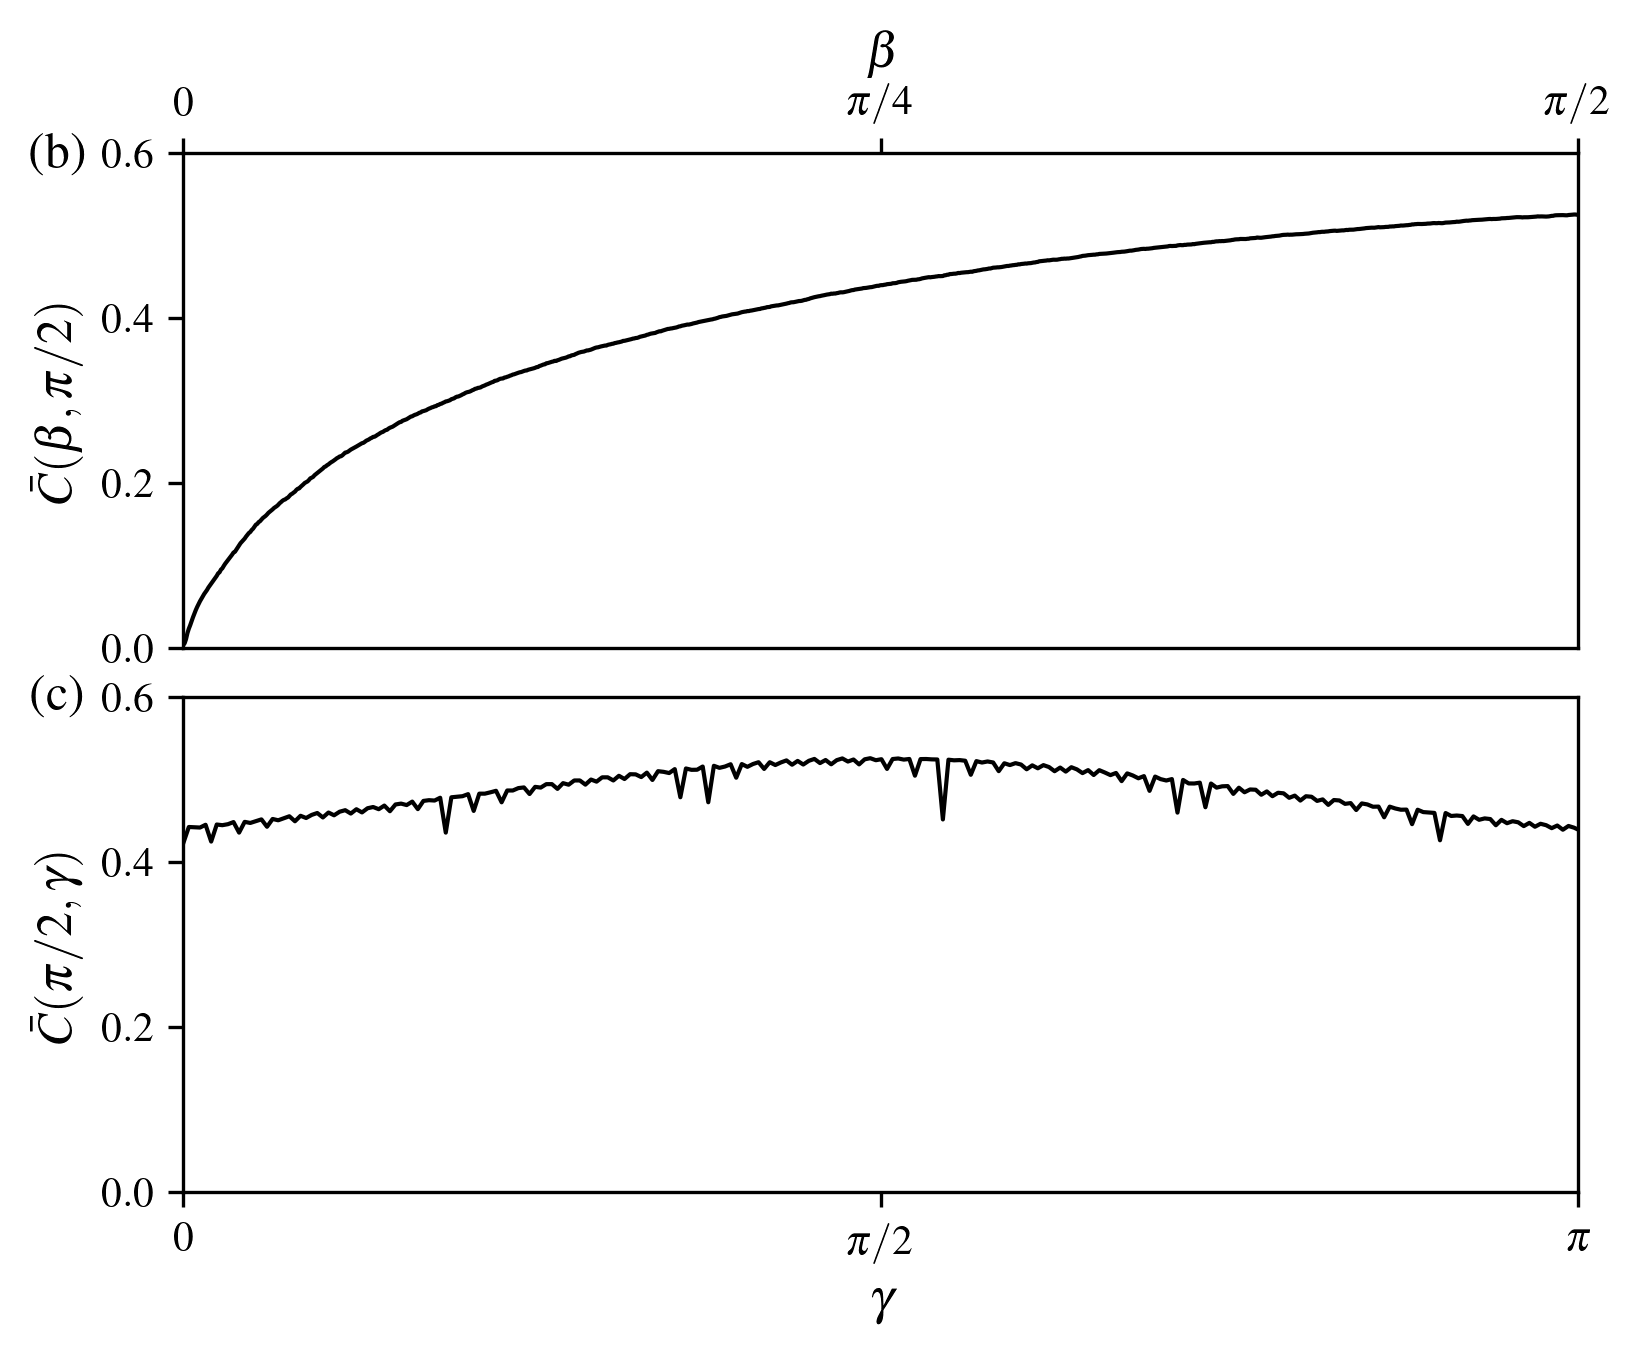

In [39]:
fig.clear()
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(6,4.5),dpi=300)
ax1.set_xlim(0,np.pi/2)
ax1.set_xlabel(r'$\beta$',fontsize=12)
ax1.set_ylim(0,0.6)
ax1.set_ylabel(r'$\bar{C}(\beta,\pi/2)$',fontsize=12)
ax1.xaxis.set_label_position('top')
ax1.set_xticks([0,np.pi/4,np.pi/2],[r'$0$',r'$\pi/4$',r'$\pi/2$'])
ax1.tick_params('x',bottom=False,top=True,labelbottom=False,labeltop=True)
fig.text(0.056,0.878, '(b)', horizontalalignment='center', verticalalignment='center', fontsize=12)
ax2.set_xlim(0,np.pi)
fig.text(0.056,0.476, '(c)', horizontalalignment='center', verticalalignment='center', fontsize=12)
ax2.set_xticks([0,np.pi/2,np.pi],[r'$0$',r'$\pi/2$',r'$\pi$'])
ax2.set_xlabel(r'$\gamma$',fontsize=12)
ax2.set_ylim(0,0.6)
ax2.set_ylabel(r'$\bar{C}(\pi/2,\gamma)$',fontsize=12)
ax1.plot(full_betas,beta_concurrences,'k',lw=1)
ax2.plot(gamma_selects,gamma_averages_selects,'k',lw=1)
fig.subplots_adjust(hspace=0.1)
# plt.tight_layout()